In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\PRAMOD KHAVARE\AppData\Local\Temp\ipykernel_14720\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('D:\\Data Science\\NLP\\Project\\ResumeScreening\\UpdatedResumeDataSet.csv')

In [3]:
raw_data  = pd.read_csv('D:\\Data Science\\NLP\\Project\\ResumeScreening\\UpdatedResumeDataSet.csv')

In [4]:
data.shape

(962, 2)

In [5]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
data['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [7]:
data['Category'].isnull().sum()

0

In [8]:
data['Resume'].isnull().sum()

0

C:\Users\PRAMOD KHAVARE\AppData\Local\Temp\ipykernel_14720\1353301251.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='Category', data = data, palette = "Set2")


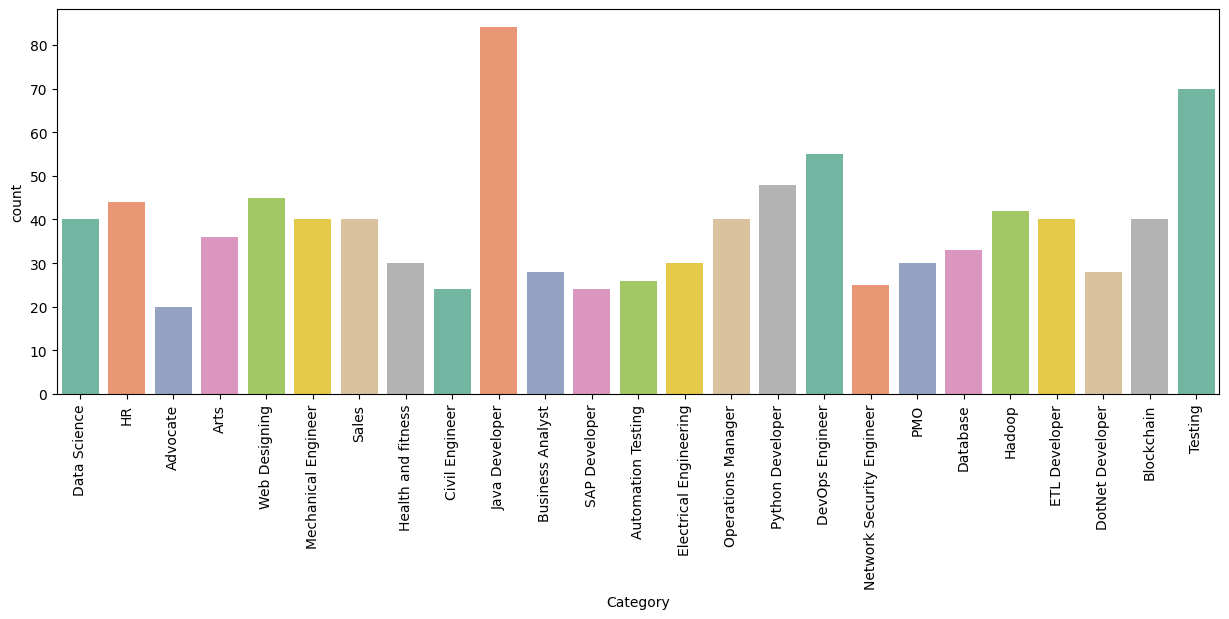

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Category', data = data, palette = "Set2")
plt.xticks(rotation=90)
# Show the plot
plt.show()

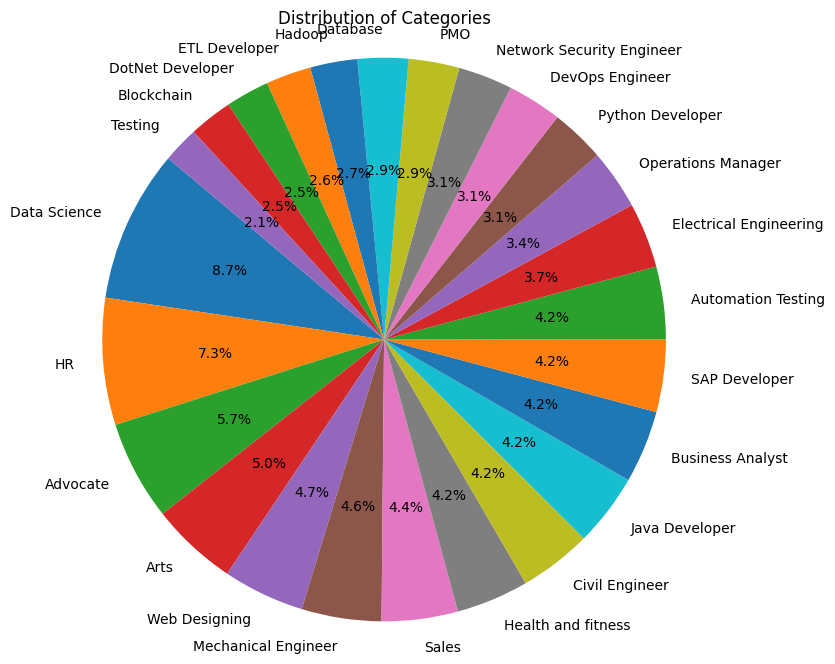

In [10]:
counts = data['Category'].value_counts()
labels = data['Category'].unique()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Categories')
plt.show()

# Cleaning Data
1. URLS
2. Hashtags
3. mentions
4. Special Letter
5. Punctuation

In [11]:
import re

In [12]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText


In [13]:
data['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [14]:
data['Resume'].apply(cleanResume)

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [15]:
data['Resume'] = data['Resume'].apply(lambda x :cleanResume(x))

In [16]:
#.get_dummies() is similar kind method of one_hot encoding
#You will get sparse matrix
#Also Ml algorith will not give biased output
pd.get_dummies(data['Category'] ,drop_first=True ,sparse=True ,dtype=int)

,Arts,Automation Testing,Blockchain,Business Analyst,Civil Engineer,Data Science,Database,DevOps Engineer,DotNet Developer,ETL Developer,...,Java Developer,Mechanical Engineer,Network Security Engineer,Operations Manager,PMO,Python Developer,SAP Developer,Sales,Testing,Web Designing
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
#LabelEncoding is simple labeling technique where you give label 1,2,3
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(data['Category'])
data['Category'] = encoder.transform(data['Category'])

In [57]:
data['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [18]:
raw_data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [19]:
data['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# Vectorization
1. Convert Text into integer 

In [20]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
tfidf =TfidfVectorizer(stop_words='english')

tfidf.fit(data['Resume'])
vector = tfidf.transform(data['Resume']).toarray()

In [21]:
list(tfidf.get_feature_names_out(vector))

['000',
 '01',
 '017',
 '02',
 '03',
 '04',
 '04th',
 '05',
 '050education',
 '06th',
 '07',
 '07education',
 '08',
 '09876971076',
 '0education',
 '10',
 '100',
 '101',
 '104',
 '108',
 '109',
 '10g',
 '10magicalfingers',
 '11',
 '110',
 '110v',
 '11171',
 '115',
 '118',
 '1180',
 '11g',
 '11geducation',
 '11gr2',
 '11kv',
 '12',
 '120',
 '1200',
 '125',
 '12c',
 '12d',
 '12k',
 '13',
 '130',
 '132kv',
 '14',
 '147',
 '15',
 '150',
 '1500',
 '16',
 '163',
 '168',
 '16th',
 '17',
 '175',
 '17th',
 '18',
 '1800',
 '1800s',
 '18c',
 '19',
 '1900',
 '1900s',
 '1972',
 '1986',
 '1992',
 '1993',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '19xx',
 '1st',
 '1stexpert',
 '1x',
 '1year',
 '20',
 '2000',
 '2000a',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2006education',
 '2007',
 '2008',
 '2008r2',
 '2009',
 '200s',
 '201',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2021',
 '2026',
 '20656',
 '2065864',
 '20th',
 '21',
 '210',
 '

In [22]:
from sklearn.model_selection import train_test_split 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(vector , data['Category'], test_size=0.2, random_state=42)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
clf = KNeighborsClassifier()
clf.fit(X_train ,y_train)
ypred = clf.predict(X_test)

In [27]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [34]:
from sklearn.multiclass import OneVsRestClassifier 
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train ,y_train)
ypred = model.predict(X_test)

In [36]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [37]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test ,ypred)

0.9844559585492227

'Advocate'

In [51]:
for i in enumerate(raw_data['Category'].unique()):
    print(i)

(0, 'Data Science')
(1, 'HR')
(2, 'Advocate')
(3, 'Arts')
(4, 'Web Designing')
(5, 'Mechanical Engineer')
(6, 'Sales')
(7, 'Health and fitness')
(8, 'Civil Engineer')
(9, 'Java Developer')
(10, 'Business Analyst')
(11, 'SAP Developer')
(12, 'Automation Testing')
(13, 'Electrical Engineering')
(14, 'Operations Manager')
(15, 'Python Developer')
(16, 'DevOps Engineer')
(17, 'Network Security Engineer')
(18, 'PMO')
(19, 'Database')
(20, 'Hadoop')
(21, 'ETL Developer')
(22, 'DotNet Developer')
(23, 'Blockchain')
(24, 'Testing')


In [43]:
import pickle 
pickle.dump(obj=tfidf ,file=open('tfidf.pkl' ,'wb'))
pickle.dump(obj=model , file=open('model.pkl' ,'wb'))

In [55]:
my_resume = """Education Details 
August 2018 to January 2021 Entermediate Maths Mumbai, Maharashtra Sunbeam academy , samne ghat , varanasi
Martial arts (fitness job) 


Skill Details 
Company Details 
company - Sports Authority
description - I am 2nd dan black belt in karate (martial arts)
I am in a searching of personal trainer job for fitness.
I won 3 gold medals in national karate championship.
I won 7 gold medals in state karate championship.
3 times best player of the year of uttar pradesh award ..
Represented india and Selected for world karate championship held at Croatia , Europe.
â¢
Arts"""

In [132]:
#Clean input data 
cleaned_resume = cleanResume(my_resume)

#Apply transformer on input data 
input_feature = tfidf.transform([cleaned_resume])

#prediction
prediction_id = model.predict(input_feature)[0]


prediction_id

category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}
category_name = category_mapping.get(prediction_id ,'Unknown')

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Arts
1
